<a href="https://colab.research.google.com/github/sarmi2325/Supervised_Learning/blob/main/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importing Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Loading the dataset
df=pd.read_csv('hw_200.csv')
df.head()




,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [59]:
#decribing the data
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,200.000000,200.000000,200.000000
mean,100.500000,67.949800,127.221950
std,57.879185,1.940363,11.960959
min,1.000000,63.430000,97.900000
25%,50.750000,66.522500,119.895000
50%,100.500000,67.935000,127.875000
75%,150.250000,69.202500,136.097500
max,200.000000,73.900000,158.960000


Text(0, 0.5, 'Weight')

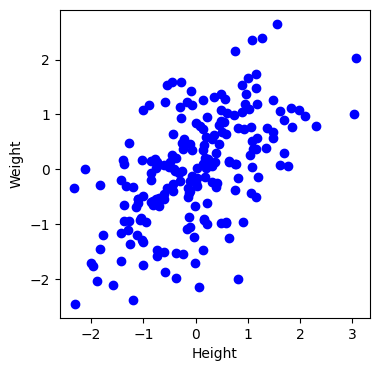

In [61]:
# Clean up column names
df.columns = df.columns.str.strip().str.replace('"', '')
#initializing the feature and target
x = df['Height(Inches)']
y = df['Weight(Pounds)']
#Normalizing the data
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()
n = len(x)
#visualization of the dataset
plt.figure(figsize=(4,4))
plt.scatter(x,y,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

In [62]:
#Initializing the hyperparameters
lr=0.01
epoch=1000
w=0.0
b=0.0
#Training the model
for e in range(epoch):
  dy=w*x+b
  loss = (1/n)*sum(np.power(dy-y,2))
  dw = (2/n)*sum((dy-y)*x)
  db = (2/n)*sum(dy-y)
  #updating the weight and bias
  w = w-lr*dw
  b = b-lr*db

  if e%100==0:
    print(f"epoch : {e} loss : {loss} w:{w} b:{b}")


epoch : 0 loss : 0.994999999999999 w:0.011081608218784756 b:1.4984541385487663e-17
epoch : 100 loss : 0.6919907634660661 w:0.4837408887951341 b:-6.014563846967747e-17
epoch : 200 loss : 0.686551580022833 w:0.5470676255253515 b:-3.090687428208837e-16
epoch : 300 loss : 0.6864539436706627 w:0.5555521211222819 b:-3.7835776178773986e-16
epoch : 400 loss : 0.6864521910441217 w:0.5566888710836926 b:-3.886606314562614e-16
epoch : 500 loss : 0.686452159583505 w:0.556841172473917 b:-3.886828359167538e-16
epoch : 600 loss : 0.6864521590187697 w:0.5568615777646596 b:-3.8843858685133646e-16
epoch : 700 loss : 0.6864521590086323 w:0.556864311658879 b:-3.883275645488739e-16
epoch : 800 loss : 0.6864521590084506 w:0.5568646779451375 b:-3.882720533976424e-16
epoch : 900 loss : 0.6864521590084472 w:0.5568647270200511 b:-3.886606314562613e-16


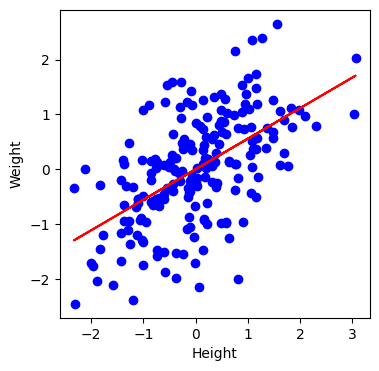

In [67]:
#Visualizing the best fit line

plt.figure(figsize=(4,4))
plt.scatter(x,y,color='blue')
plt.plot(x,dy,color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [65]:
#mse (which penalizes outliers heavily)
mse = (1/n) * np.sum((dy - y) ** 2)

#rmse (same as mse, output unit is same as the target)
rmse= np.sqrt(mse)

#mae (used where outliers are not considered as much problems)
mae = (1/n)*np.sum(np.abs(dy-y))

#R2 (used to find the variance of the data,the best fit line covered)
ss_res = np.sum((y - dy) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

MSE  : 0.6865
RMSE : 0.8285
MAE  : 0.6487
R²   : 0.3101
